#  Lab-Pydub-Filter

- Record an audio file of the following sentence "Hello, my name is <your_name_here>"
- Open the file using pydub
- Apply a low-pass `Butterworth` digital filter (the order of the filter doesn't matter). Choose different `Wn` also known as cuttoff frequency and plot the signal `filtered` and `unfiltered`. Use `filtfilt`.
- Do the same with a high-pass filter (read the docs 😼)
- Explain the visual differences of the high-pass and low-pass filter on the filtered signal.
- Choose `butter` filter parameters to save an `mp3` audio file of your recording that resembles to be recorded from a phone call

## How to deliver the project

- Deliver your code in following folder as a PR: `module2/lab-pydub-filter`

## Links & Resources

- https://github.com/jiaaro/pydub
- https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.signal.butter.html
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.filtfilt.html

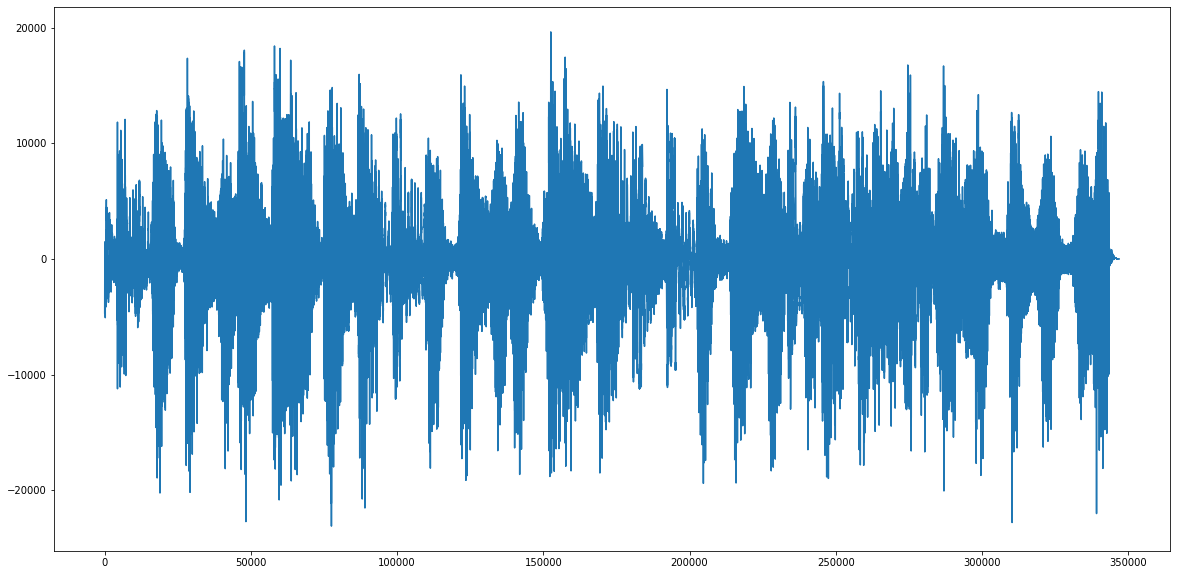

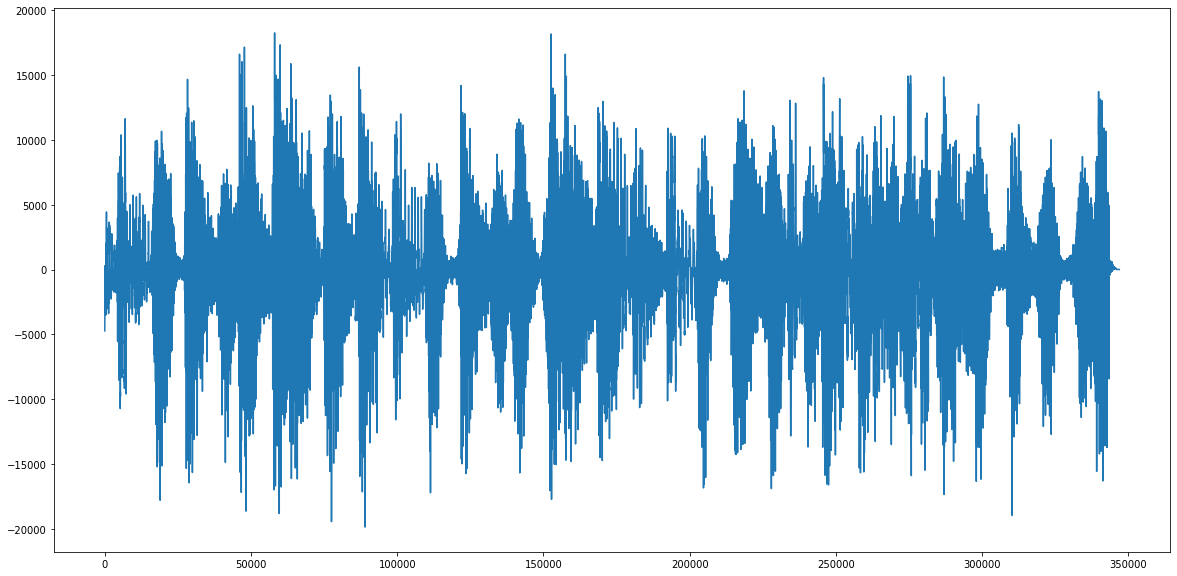

In [86]:
from pydub import AudioSegment
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

sound = AudioSegment.from_file("./input/y_la_otra_pierna.ogg")

samples = sound.get_array_of_samples()

plt.figure(figsize=(20,10))
plt.plot(samples)
#Creation of the filter
sf = 40000
cutOff = 2000 # Cutoff frequency
nyq = 0.5 * sf
N  = 3   # Filter order
fc = cutOff / nyq # Cutoff frequency normal
b, a = signal.butter(N, fc)
#Apply the filter
tempf = signal.filtfilt(b,a, samples)
plt.figure(figsize=(20,10))
plt.plot(tempf)




In [84]:
# Before apply filter
sound

In [87]:
# After apply filter

audio_filtered = [int(x) for x in tempf]
samples_array = array.array(audio.array_type, audio_filtered)

new_sound = audio._spawn(samples_array)
new_sound